In [1]:
#손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [4]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer) #은닉층에 내가 만든 레이어 추가?

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
model = model_fn()
model.summary()

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                │ (None, 784)             │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense (Dense)                    │ (None, 100)             │        78,500 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_1 (Dense)                  │ (None, 10)              │         1,010 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#optimizer, validation check (검증 손실)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [7]:
history.history.keys() #정확도와 손실 정도 저장

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

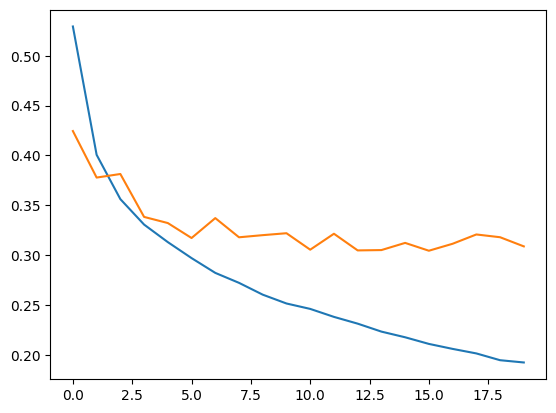

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) #정확도 보다 중요
plt.plot(history.history['val_loss'])
#plt.plot(history.history['accuracy'])
plt.show()

In [9]:
# 드롭아웃

In [10]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)              │ (None, 784)             │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_2 (Dense)                  │ (None, 100)             │        78,500 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout (Dropout)                │ (None, 100)             │             0 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_3 (Dense)                  │ (None, 10)              │         1,010 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#콜백(피드백:조건에 부합했을때 실행하는 것) // save_best_only=True > 모든 epoch가 아닌 최고로 좋은 모델 하나만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [12]:
#콜백 번외:EarlyStopping

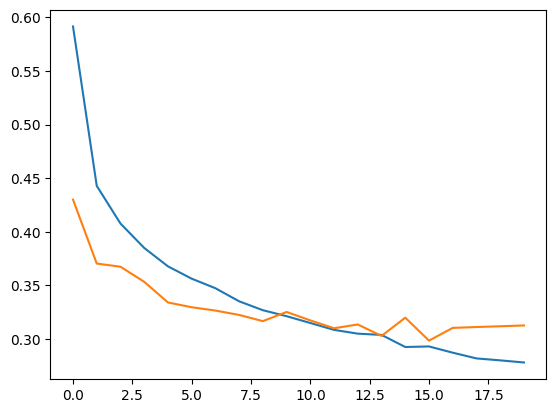

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [14]:
#모델 저장과 복원 (재사용을 가능하게 함)

In [15]:
model.save_weights('model.weights.h5') #가중치 저장

In [16]:
model.save('my_model.keras')